In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
%matplotlib inline

In [26]:
df = pd.read_csv('../../../datasets/parte1/weatherAUS.csv')

#### Split Data

In [27]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(['Date'], inplace=True, axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Drop columns which do not improve the model

In [28]:
df.drop(['Location'], axis=1, inplace=True)

## Missing Values


#### Mean imputation in NA values

In [29]:
df.drop(['Evaporation'], axis=1, inplace=True)
df.drop(['Sunshine'], axis=1, inplace=True)
df.drop(['Cloud9am'], axis=1, inplace=True)
df.drop(['Cloud3pm'], axis=1, inplace=True)

In [30]:
mintemp_mean=df['MinTemp'].mean() 
df['MinTemp'].fillna(mintemp_mean, inplace=True)

mintemp_mean=df['MinTemp'].mean() 
df['MinTemp'].fillna(mintemp_mean, inplace=True)

maxtemp_mean=df['MaxTemp'].mean() 
df['MaxTemp'].fillna(maxtemp_mean, inplace=True)

rainfall_mean=df['Rainfall'].mean() 
df['Rainfall'].fillna(rainfall_mean, inplace=True)

windgustspeed_mean=df['WindGustSpeed'].mean() 
df['WindGustSpeed'].fillna(windgustspeed_mean, inplace=True)

windspeed9am_mean=df['WindSpeed9am'].mean() 
df['WindSpeed9am'].fillna(windspeed9am_mean, inplace=True)

windspeed3pm_mean=df['WindSpeed3pm'].mean() 
df['WindSpeed3pm'].fillna(windspeed3pm_mean, inplace=True)

humidity9am_mean=df['Humidity9am'].mean() 
df['Humidity9am'].fillna(humidity9am_mean, inplace=True)

humidity3pm_mean=df['Humidity3pm'].mean() 
df['Humidity3pm'].fillna(humidity3pm_mean, inplace=True)

pressure9am_mean=df['Pressure9am'].mean() 
df['Pressure9am'].fillna(pressure9am_mean, inplace=True)

pressure3pm_mean=df['Pressure3pm'].mean() 
df['Pressure3pm'].fillna(pressure3pm_mean, inplace=True)

temp9am_mean=df['Temp9am'].mean() 
df['Temp9am'].fillna(temp9am_mean, inplace=True)

temp3pm_mean=df['Temp3pm'].mean() 
df['Temp3pm'].fillna(temp3pm_mean, inplace=True)
 

In [31]:
df.dropna(inplace=True)

print(df.isna().sum())

df.shape

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64


(123710, 20)

## Label encoding

In [32]:
label_encoder = LabelEncoder()

df['EncodedWindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df.drop('WindGustDir', axis = 1, inplace=True)

df['EncodedWindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df.drop('WindDir9am', axis = 1, inplace=True)

df['EncodedWindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df.drop('WindDir3pm', axis = 1, inplace=True)

df['EncodedRainToday'] = label_encoder.fit_transform(df['RainToday'])
df.drop('RainToday', axis = 1, inplace=True)

df['EncodedRainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
df.drop('RainTomorrow', axis = 1, inplace=True)


## Weighted Loss

In [33]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['EncodedRainTomorrow']), y=df['EncodedRainTomorrow'])
class_weights_dict = {class_label: weight for class_label, weight in zip(np.unique(df['EncodedRainTomorrow']), class_weights)}

# Add a new column 'weight' to the DataFrame
df['weight'] = df['EncodedRainTomorrow'].map(class_weights_dict)

In [34]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Temp3pm,Year,Month,Day,EncodedWindGustDir,EncodedWindDir9am,EncodedWindDir3pm,EncodedRainToday,EncodedRainTomorrow,weight
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,21.8,2008,12,1,13,13,14,0,0,0.642196
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,24.3,2008,12,2,14,6,15,0,0,0.642196
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,23.2,2008,12,3,15,13,15,0,0,0.642196
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,26.5,2008,12,4,4,9,0,0,0,0.642196
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,29.7,2008,12,5,13,1,7,0,0,0.642196


In [35]:
df.to_csv('../../../datasets/parte1/dataset_cleaned.csv', index=False)


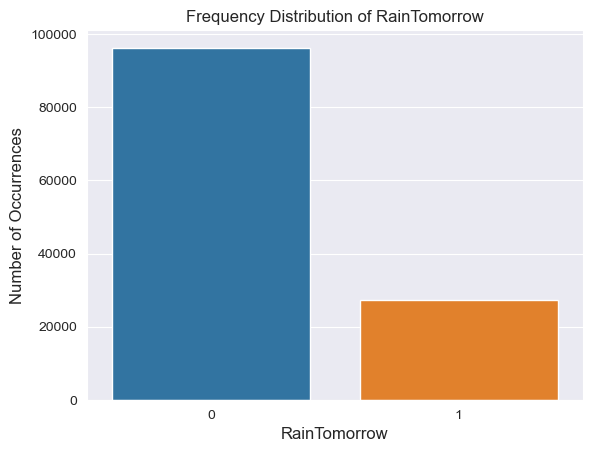

In [36]:
raintomorrow_count = df['EncodedRainTomorrow'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintomorrow_count.index, y=raintomorrow_count.values)
plt.title('Frequency Distribution of RainTomorrow')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainTomorrow', fontsize=12)
plt.show()